In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import re
import matplotlib
matplotlib.font_manager._rebuild()

matplotlib.rc("font",family="SimHei")



In [6]:
df = pd.read_csv('算法.csv',sep=",")
df.head()

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签
0,NLP算法工程师,上海,建信览智,15-20K,硕士,在校/应届,计算机软件
1,NLP算法工程师,上海·闵行区·浦江,泛微网络,15-30K·15薪,硕士,在校/应届,计算机软件
2,无线通信算法工程师,上海·浦东新区·金桥,华为技术有限公司,16-30K,本科,在校/应届,计算机软件
3,机器学习算法工程师,上海,货拉拉科技,25-50K,本科,在校/应届,互联网
4,软件算法,上海·浦东新区·金桥,华为,13-26K,本科,在校/应届,计算机软件


In [7]:
offer = df['薪水']

In [8]:
yearOfferMin=pd.Series(dtype=np.float64)
yearOfferMax=pd.Series(dtype=np.float64)
for index,value in offer.items():
    xinshui = re.findall(r'\d+',str(value))
    if(len(xinshui)==3):
        Min = int(xinshui[0])*int(xinshui[2])
        Max = int(xinshui[1])*int(xinshui[2])
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))
    else:
        Min = int(xinshui[0])*12
        Max = int(xinshui[1])*12
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))        
#yearOfferMin.index=offer.index
#yearOfferMax.index=offer.index

yearOfferMax.index=offer.index
yearOfferMin.index=offer.index
df['最低年薪'] = yearOfferMin
df['最高年薪'] = yearOfferMax
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪
0,NLP算法工程师,上海,建信览智,15-20K,硕士,在校/应届,计算机软件,180,240
1,NLP算法工程师,上海·闵行区·浦江,泛微网络,15-30K·15薪,硕士,在校/应届,计算机软件,225,450
2,无线通信算法工程师,上海·浦东新区·金桥,华为技术有限公司,16-30K,本科,在校/应届,计算机软件,192,360
3,机器学习算法工程师,上海,货拉拉科技,25-50K,本科,在校/应届,互联网,300,600
4,软件算法,上海·浦东新区·金桥,华为,13-26K,本科,在校/应届,计算机软件,156,312
...,...,...,...,...,...,...,...,...,...
231,通用软件开发,上海·浦东新区·金桥,华为,20-35K·14薪,本科,在校/应届,计算机软件,280,490
232,超声波感知与融合算法工程师（实习生）,上海,大轩,8-11K,本科,在校/应届,计算机软件,96,132
233,算法工程师,上海·普陀区·中山北路,上海麦默医疗科技,8-13K,硕士,在校/应届,医疗设备/器械,96,156
234,iOS开发_校招,上海·闵行区·合川路,今日头条,15-25K,本科,在校/应届,移动互联网,180,300


In [9]:
tongfen = [20]

df['最高年薪分段']=pd.qcut(df['最高年薪'],q=10)
df['最低年薪分段']=pd.qcut(df['最低年薪'],q=10)

In [10]:
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪,最高年薪分段,最低年薪分段
0,NLP算法工程师,上海,建信览智,15-20K,硕士,在校/应届,计算机软件,180,240,"(216.0, 246.0]","(175.0, 180.0]"
1,NLP算法工程师,上海·闵行区·浦江,泛微网络,15-30K·15薪,硕士,在校/应届,计算机软件,225,450,"(420.0, 450.0]","(210.0, 225.0]"
2,无线通信算法工程师,上海·浦东新区·金桥,华为技术有限公司,16-30K,本科,在校/应届,计算机软件,192,360,"(356.0, 360.0]","(180.0, 210.0]"
3,机器学习算法工程师,上海,货拉拉科技,25-50K,本科,在校/应届,互联网,300,600,"(560.0, 960.0]","(288.0, 320.0]"
4,软件算法,上海·浦东新区·金桥,华为,13-26K,本科,在校/应届,计算机软件,156,312,"(300.0, 356.0]","(140.0, 175.0]"
...,...,...,...,...,...,...,...,...,...,...,...
231,通用软件开发,上海·浦东新区·金桥,华为,20-35K·14薪,本科,在校/应届,计算机软件,280,490,"(450.0, 560.0]","(240.0, 288.0]"
232,超声波感知与融合算法工程师（实习生）,上海,大轩,8-11K,本科,在校/应届,计算机软件,96,132,"(71.999, 156.0]","(35.999, 106.0]"
233,算法工程师,上海·普陀区·中山北路,上海麦默医疗科技,8-13K,硕士,在校/应届,医疗设备/器械,96,156,"(71.999, 156.0]","(35.999, 106.0]"
234,iOS开发_校招,上海·闵行区·合川路,今日头条,15-25K,本科,在校/应届,移动互联网,180,300,"(246.0, 300.0]","(175.0, 180.0]"


In [11]:
df.to_excel("算法.xlsx",index=False)

In [12]:
dict={}
for i in pd.qcut(df['最高年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

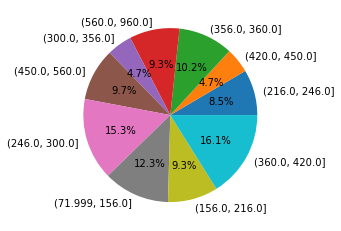

In [13]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

In [14]:
dict={}
for i in pd.qcut(df['最低年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

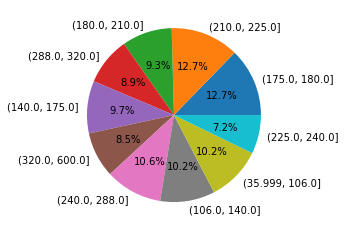

In [15]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

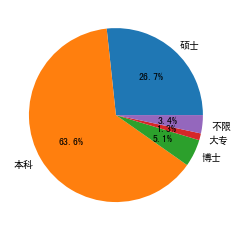

In [19]:
dict={}
for i in df['学历']:
    if not (i in dict.keys()):
        dict[i]=1
    else:
        dict[i]+=1
pyplot.pie(dict.values(),labels=dict.keys(),autopct='%.1f%%')
pyplot.show()

In [17]:
print("最低年薪最高:"+str(df['最低年薪'].max())+"         "+"最低年薪最低:"+str(df['最低年薪'].min())+"      "+"最低年薪中位数:"+str(df['最低年薪'].median())+"      "+"最低年薪众数:"+str(df['最低年薪'].mode())+"      "+"最低年薪均值:"+str(df['最低年薪'].mean()))

最低年薪最高:600         最低年薪最低:36      最低年薪中位数:210.0      最低年薪众数:0    180
dtype: int64      最低年薪均值:211.364406779661


In [18]:
print("最高年薪最高:"+str(df['最高年薪'].max())+"         "+"最高年薪最低:"+str(df['最高年薪'].min())+"      "+"最高年薪中位数:"+str(df['最高年薪'].median())+"      "+"最高年薪众数:"+str(df['最高年薪'].mode())+"      "+"最高年薪均值:"+str(df['最高年薪'].mean()))

最高年薪最高:960         最高年薪最低:72      最高年薪中位数:356.0      最高年薪众数:0    360
dtype: int64      最高年薪均值:347.114406779661
